In [43]:
import keras
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.utils import np_utils
import os
import cv2
import tensorflow as tf

In [63]:
#Load Dataset
def load_data(path):
    files = os.listdir(path)
    images = []
    labels = []

    for f in files:
        print(f)
        class_number = files.index(f)
        pix = os.listdir(path + f)
        for person_img in pix:
            complete_path = os.path.join(path, f, person_img)
            img_array = cv2.imread(complete_path)
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
            new_array = cv2.resize(img_array, (64, 64))
            images.append(new_array)
            labels.append(class_number)

    data = np.array(images)
    data = data/255
    data = np.array(data).reshape(-1,64, 64, 1)
    labels = np.array(labels)
    labels = np_utils.to_categorical(labels)
    return data, labels

X_train, y_train= load_data("Dataset/") #Pass path of the dataset

0
A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z


In [64]:
train_data,test_data,train_label,test_label=train_test_split(X_train,y_train,test_size=0.2)

In [65]:
model = Sequential()
# First convolutional layer accepts image input
model.add(Conv2D(filters=5, kernel_size=5, padding='same', activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D(pool_size=(4,4)))

model.add(Conv2D(filters=15, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4)))

model.add(Conv2D(filters=25, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4)))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(27, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Summarize the model
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 64, 64, 5)         130       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 16, 16, 5)         0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 16, 16, 15)        1890      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 4, 4, 15)          0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 4, 4, 25)          9400      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 1, 1, 25)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 25)              

In [66]:
history=model.fit(train_data,train_label,shuffle=True,epochs=22,validation_split=0.2) #20% for validation

Epoch 1/22
486/486 [==============================] - 36s 72ms/step - loss: 2.5258 - accuracy: 0.2757 - val_loss: 0.7416 - val_accuracy: 0.7803
Epoch 2/22
486/486 [==============================] - 39s 81ms/step - loss: 0.6218 - accuracy: 0.8186 - val_loss: 0.3410 - val_accuracy: 0.8922
Epoch 3/22
486/486 [==============================] - 45s 93ms/step - loss: 0.2750 - accuracy: 0.9128 - val_loss: 0.1964 - val_accuracy: 0.9318
Epoch 4/22
486/486 [==============================] - 45s 93ms/step - loss: 0.1640 - accuracy: 0.9516 - val_loss: 0.0755 - val_accuracy: 0.9799
Epoch 5/22
486/486 [==============================] - 43s 89ms/step - loss: 0.1007 - accuracy: 0.9688 - val_loss: 0.0512 - val_accuracy: 0.9851
Epoch 6/22
486/486 [==============================] - 43s 88ms/step - loss: 0.0660 - accuracy: 0.9803 - val_loss: 0.0656 - val_accuracy: 0.9810
Epoch 7/22
486/486 [==============================] - 43s 88ms/step - loss: 0.0589 - accuracy: 0.9826 - val_loss: 0.0256 - val_accuracy:

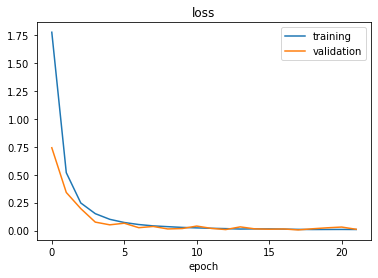

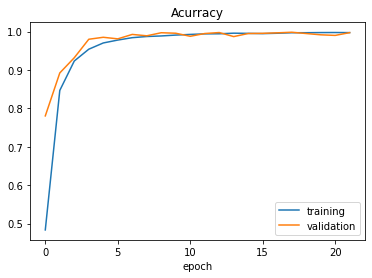

In [67]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.savefig("Loss_graph")
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.savefig("Accuracy_graph")
plt.show()

In [68]:
result=model.evaluate(test_data,test_label)     #for check test score

152/152 [==============================] - 5s 31ms/step - loss: 0.0059 - accuracy: 0.9986


In [69]:
model.save("Model2.h5")